# Assessment 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import Image

# 1a)

In [3]:
##
df = pd.read_csv('datasaurus.csv')
dataset_names = df["dataset"].unique()

for dataset_name in dataset_names:
    x = df.loc[df["dataset"] == dataset_name, "x"]
    y= df.loc[df["dataset"] == dataset_name, "y"]

    correlation = stats.pearsonr(x, y)[0]

    slope, intercept, _, _, _ = stats.linregress(x, y)

    print(f" {dataset_name} has the slope(b1) {round(slope, 3)} and the intercept (b0) {round(intercept,3)}, correlation: {round(correlation,3)}")

 dino has the slope(b1) -0.104 and the intercept (b0) 53.453, correlation: -0.064
 away has the slope(b1) -0.103 and the intercept (b0) 53.425, correlation: -0.064
 h_lines has the slope(b1) -0.099 and the intercept (b0) 53.211, correlation: -0.062
 v_lines has the slope(b1) -0.112 and the intercept (b0) 53.891, correlation: -0.069
 x_shape has the slope(b1) -0.105 and the intercept (b0) 53.554, correlation: -0.066
 star has the slope(b1) -0.101 and the intercept (b0) 53.327, correlation: -0.063
 high_lines has the slope(b1) -0.11 and the intercept (b0) 53.809, correlation: -0.069
 dots has the slope(b1) -0.097 and the intercept (b0) 53.098, correlation: -0.06
 circle has the slope(b1) -0.11 and the intercept (b0) 53.797, correlation: -0.068
 bullseye has the slope(b1) -0.11 and the intercept (b0) 53.809, correlation: -0.069
 slant_up has the slope(b1) -0.11 and the intercept (b0) 53.813, correlation: -0.069
 slant_down has the slope(b1) -0.111 and the intercept (b0) 53.85, correlation

# 1b)

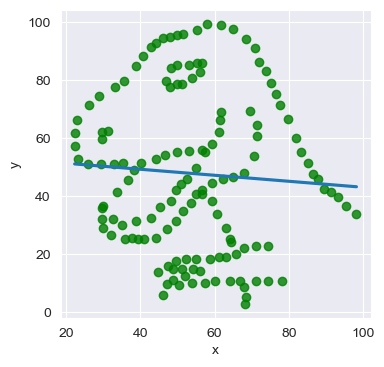

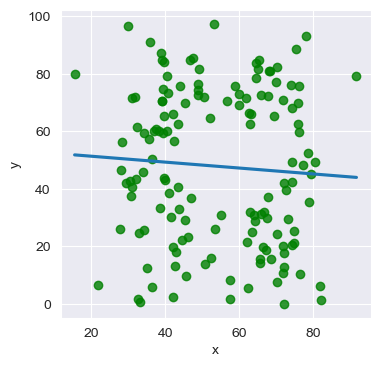

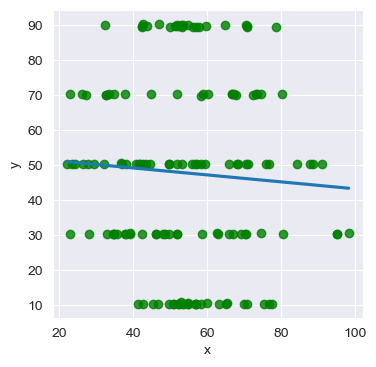

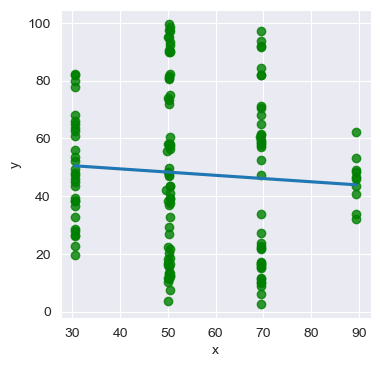

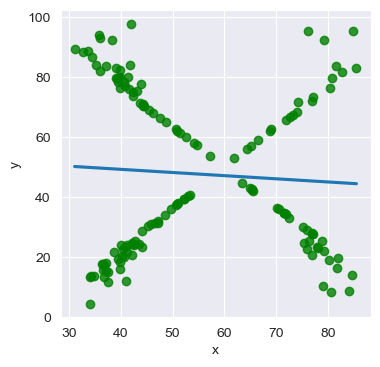

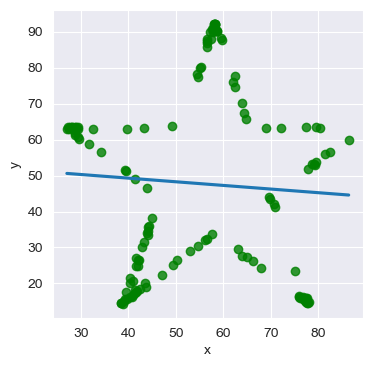

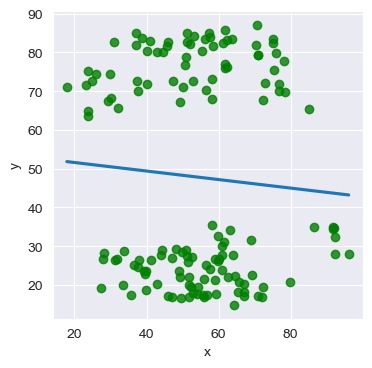

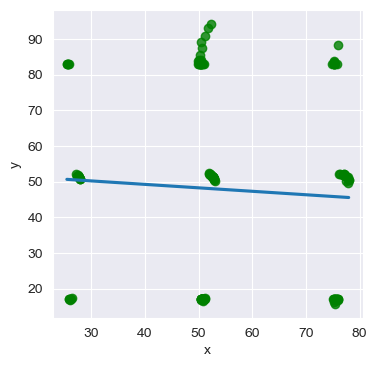

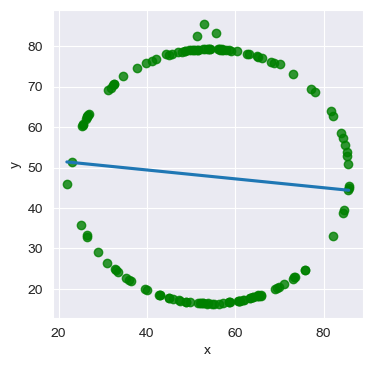

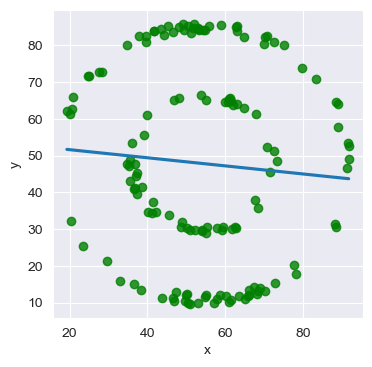

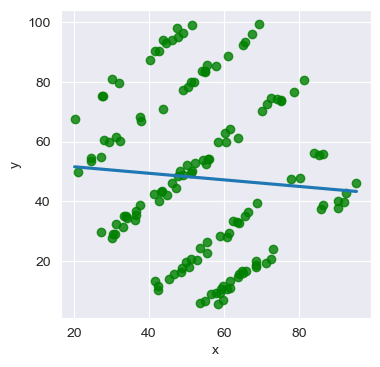

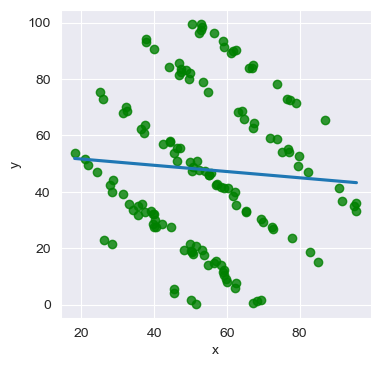

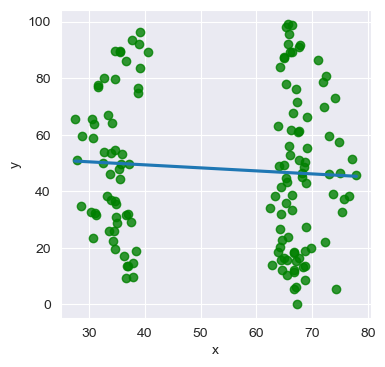

In [4]:
for dataset_name in dataset_names:
    x = df.loc[df["dataset"] == dataset_name, "x"]
    y = df.loc[df["dataset"] == dataset_name, "y"]

    plt.figure(figsize = (4,4))

    sns.regplot(x=x, y=y, ci=None, scatter_kws={"color": "green"})

# 1c)

One could split the groups again and for linear regression for sub groups of x and still staying with the linear regression, but this could falsify the results, as were taking away a lot of the context. So we could resort to polynomial regression see if that fits the non linear relationships better or not.




# 2
The Maximum I was able to achieve was 589.33, but if I were able to choose the B0 intersect freely a SSE could infinitely large. The inverse of this would be the having all the points on the line, which would make the SSE 0, which also acts as the smallest number possible when calculating 2d areas.

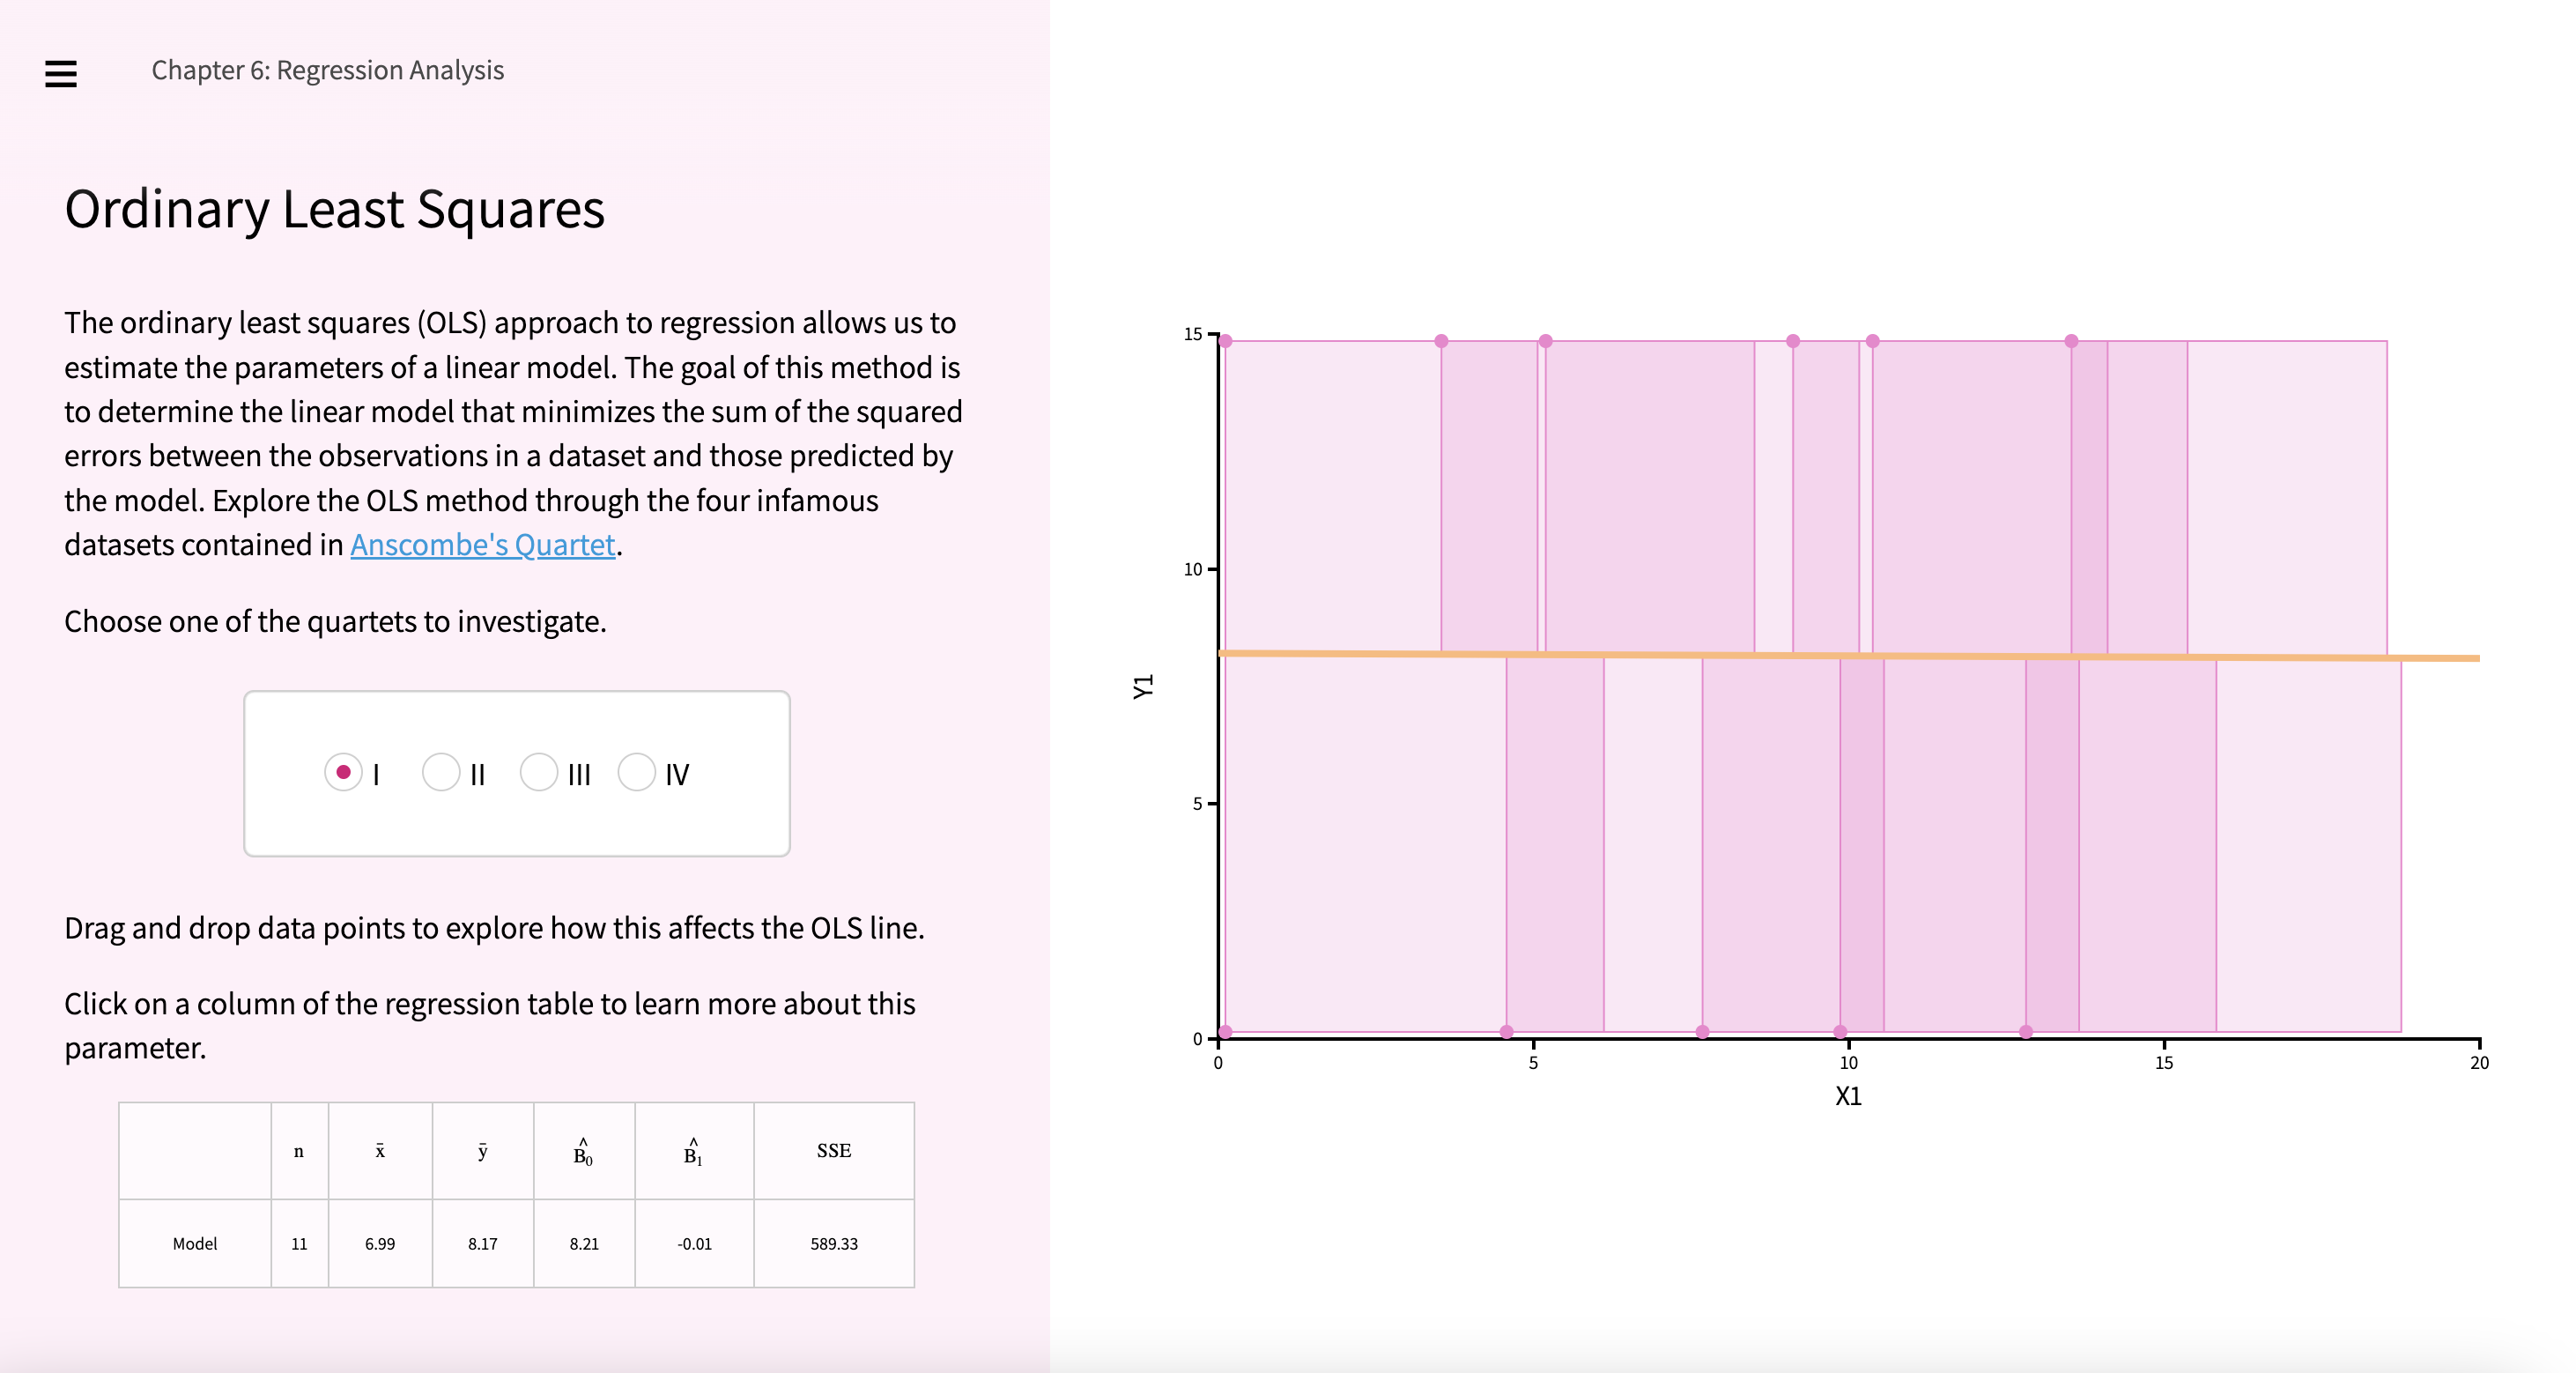

In [5]:
Image(filename="2a.png", width=700, height=300)

# 3)

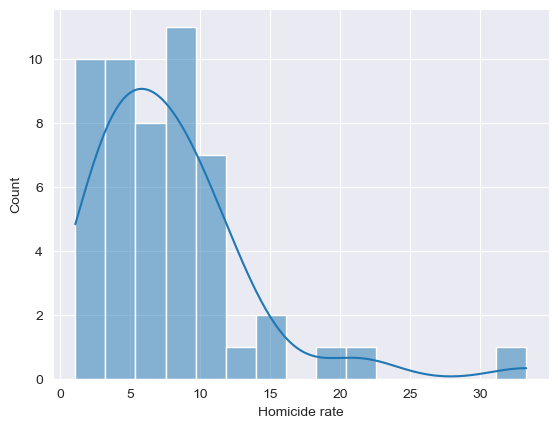

In [15]:
## Getting homicide rate:
df_hom = pd.read_csv('wikipedia_table.csv')
df_hom = df_hom["Homicide rate"]

sns.histplot(x=df_hom, bins=15, kde=True)
plt.show()

_As the data is skewed I will opt for the median instead of mean in further calculations_

### Bootstrapped confidence intervals

Bootstrapped 90% CI for Median (Bounds between 5% and 95%): (5.55, 8.25)


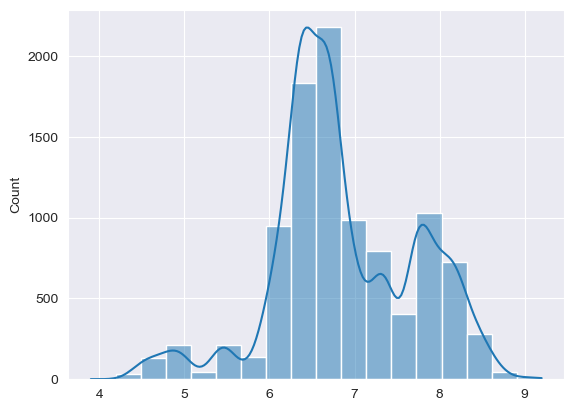

In [31]:
#Making the bootstrap function
def bootstrap(data, num_bootstrap=10000, confi_Inter=90):

    # choosing the bootstrap samples
    boot_samples = np.random.choice(data, size=(num_bootstrap, len(data)), replace=True)

    #calculate the median fpr each sample
    boot_statistics = np.apply_along_axis(np.median, 1, boot_samples)

    # showing the plot of all the medians together
    sns.histplot(x=boot_statistics, bins=18, kde=True)

    # calculate the 90% confidence interval using all the bootstraps
    lower_bound = np.percentile(boot_statistics, (100 - confi_Inter) / 2)
    upper_bound = np.percentile(boot_statistics, 100 - (100 - confi_Inter) / 2)

    return lower_bound, upper_bound


# Get bootstrapped CIs for the median
boot_ci = bootstrap(df_hom)
print(f"Bootstrapped 90% CI for Median (Bounds between 5% and 95%): {boot_ci_median}")



### calculated confidence intervals (central limit theorem)

$$
CI = \bar{x} \pm Z_{\frac{\alpha}{2}} \times \frac{s}{\sqrt{n}}
$$

$ \bar{x} $ is the sample mean

$ Z_{\frac{\alpha}{2}}$ is the Z score, showing how many standard deviations a point is from the mean

$s$ being the standard deviation

$n$ is the sample size

$ \frac{s}{\sqrt{n}}$ is the Stadard Error SE

Steps to take:
1. calculate the sample mean
2. calculate the standard deviation
3. take the Z-value
4. calculate the Standard Error (standard deviation / sample size)
5. Put everything together in the Formula

In [37]:
# The mean Sum of values divided by the count of all values
x_bar = df_hom.mean()
# the standard deviation, the square root of the squared sum of each value minus the mean which is then devided by n, the count of all values
s = df_hom.std()
# The Z value, the inverse normal of 1- the confidence level
confidence_level = 0.90
alpha = 1 - confidence_level
z_value = stats.norm.ppf(1 - alpha / 2)

# The standard error, standard deviation devided by the square root of the sample size
se = s/(np.sqrt(len(df_hom)))

CI_upper = x_bar +z_value*se
CI_lower = x_bar - z_value*se

print(f"The confidence interval is {CI_lower} and {CI_upper}.")

The confidence interval is 6.538893574777065 and 9.153414117530627.


# _* STILL HAVE TO PLOT THEM *_ -ask how